<a href="https://www.kaggle.com/code/mebiali01/bigmart-sales-prediction-analysis?scriptVersionId=112793571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# BigMart Sales Prediction

### Problem Statement
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

### Statement Analysis
* Supervised Machine Learning Problem.
* The Target Value is **Item_Outlet_Sales.**

### Goal
**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**


# Hypothesis Generation Using Product, Store and City
1. **City Type:** Stores located in urban should have higher Sales.
2. **Store Location:** Store located in popular market place shoud have higher Sales
3. **Populted City:** City with high population should have higher Sales.
4. **Store Size**: Stores with large size should have higher Sales.
5. **Staff**: Stores with more staff should have higher Sales.
6. **Branded Products**: Branded Products will have higher Sales. 
7. **Product Visbility**: Products with large space should have higher Sales.
8. **Product Frequency**: More frequnct products will have high Sales.
9. **Utilities**: Daily Basic Products should have higher Sales.
10. **Promotional Offers**: Promo Products should have higher Sales.

This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their                          Description
* **Item_Identifier:**                Unique product ID
* **Item_Weight	:**                    Weight of product
* **Item_Fat_Content	:**   Checks the Concentration of fat in the product
* **Item_Visibility	:**   The % of total display area of all similar products in a store
* **Item_Type:**    Category
* **Item_MRP	 :**          Maximum Retail Price for a Product
* **Outlet_Identifier	:**   Store ID
* **Outlet_Establishment_Year	:**The year in which store was established
* **Outlet_Size	:**The size of the store (Area Size Category)
* **Outlet_Location_Type	:**In Terms of city Tiers (Size)
* **Outlet_Type	:**Grocery store or a type of supermarket
* **Item_Outlet_Sales	:** Sales of the product In the Specific outlet

# *Libraries*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline

#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Cross Validation
from sklearn.model_selection import cross_val_score as CVS

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [3]:
#path for the training set
train_path = "/kaggle/input/bigmart-sales-data/Train.csv"
#path for the testing set
test_path = "/kaggle/input/bigmart-sales-data/Test.csv"

In [4]:
# Reading Dataset Train.csv
train = pd.read_csv(train_path)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Reading Dataset Test.csv
test = pd.read_csv(test_path)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
# Rows and columns
print(f'Training Dataset (row, col): {train.shape} \n\nTesting Dataset (row, col): {test.shape}')

Training Dataset (row, col): (8523, 12) 

Testing Dataset (row, col): (5681, 11)


# *Preprocessing*

#### Lets Combine Both DataSets since both are Similiar    

In [7]:
# test_df['Item_Outlet_Sales'] = np.nan
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 13)


In [8]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [9]:
# Summary of Dataset Train
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


# Data Exploration
Below are the steps involved to understand, clean and prepare your data for building your predictive model:

* Missing values treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Outlier treatment
* Variable transformation
* Variable creation

* ### Missing Values

In [10]:
# Lets check missing Values
print('Train:\n')
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=False)/data.shape[0] * 100)


Train:

Missing Values by Count: 

 Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64 

Missing Values by %:

 Item_Outlet_Sales            39.995776
Outlet_Size                  28.273726
Item_Weight                  17.171219
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
source          

In [11]:
# Lets check and imputate missing values
print('Missing Values in Outlet_Size :\n\n',data.Outlet_Size.value_counts())
print('\nMissing Values in Item_Weight :\n\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :

 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :

 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


**OutLet_Size** is a catogerial column, we can use **mode** to fill the values.

In [12]:
# Filling Outlet Size  missing values.
data['Outlet_Size'] = data.Outlet_Size.fillna(data.Outlet_Size.dropna().mode()[0])
# Checking if we filled all values
print( 'Missing values after filling:' ,data.Outlet_Size.isnull().sum())

Missing values after filling: 0


**Item_wieght** is a mumeric column, we need to **visulize** the its values/distribution to see clearly.

Text(0.5, 1.0, 'Item Wieght Distribution')

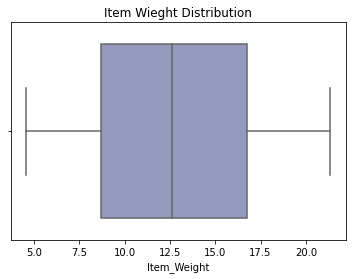

In [13]:
# sns.boxplot(data=combined['Item_Weight'],orient='v', color='c')
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')



No **Outliers** in **Item_wieght**, So we can replace **missing values** with its mean

In [14]:
# imputate missing values in item 
data['Item_Weight'] = data.Item_Weight.fillna(data.Item_Weight.dropna().mean())
print('Missing values after filling: ', data.Item_Weight.isnull().sum())

Missing values after filling:  0


In [15]:
# check info for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

* ###  Veriable Identication

In [16]:
# Numericals
num_df = data.select_dtypes('number')
# Categorial 
cat_df = data.select_dtypes('object')


In [17]:
# Lets Deal with catgorial Data First     
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())
        


Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019  

* **Item_Fat_Content**: We have **reapted values** in , lets replace them
* **Item_Type**: We have categories of **items**, that can be shrink
* **Outlet_Type**: We have Store **type2**,and **type3**, that can be combined


In [18]:
# Replace reapted values in Item_Fat_Content
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Combine Item_Type, as we have 16 catgories, but when you see **Item_identifier ID**, It has first two charachters defining the item type, these are **FD**, **DR**, **NC** means food, Drinks, Non-Consumables.
lets convert Item_Type into these 3 categories

In [19]:
# Combine Item_Type, and create new category
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

We have Store Types, **type2** and **Type3**, we can combine them, but is it good?
lets check their sales, if both have opprox similier sales, we can combine them

In [20]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There is a huge difference in sales, so not good idea to combine them

In [21]:
# Lets deal with Numerical Data
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* **Item_Visibility**: it has min **0** value, which makes no sense
* **Outlet_Establishment_Year**: Its better to address how old store is


In [22]:
# change Establishment_Year to Outlet_Age
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [23]:
# Lets consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'] == 0))

Missing Values in Item_Visibility:  879
Missing values after filling:  0


In [24]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# Data Visualization

#### Univariate Plots
lets look at the countplots for categorial data

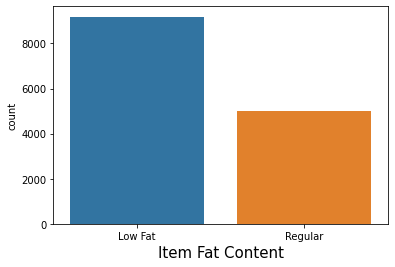

In [25]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

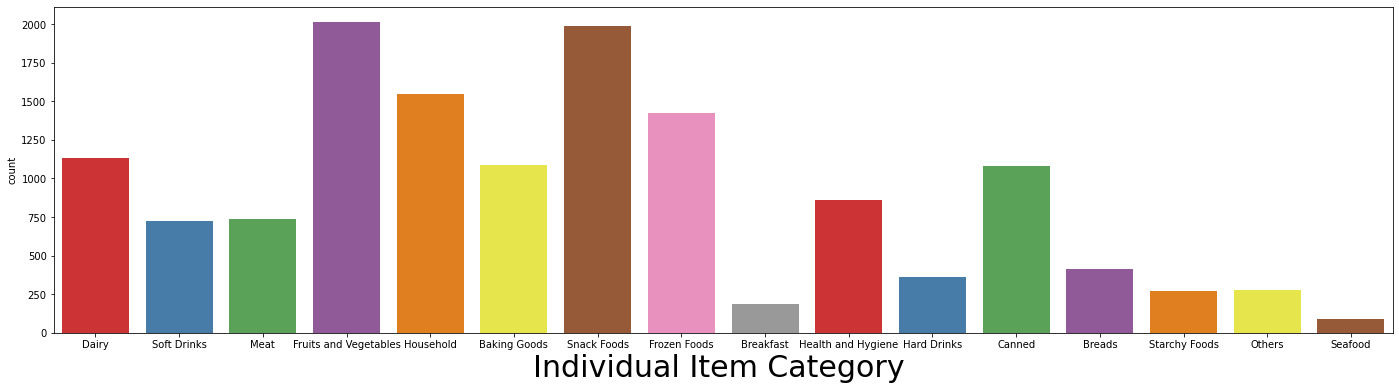

In [26]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=data, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()


# ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
# ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
# ax.set_xlabel("", fontsize=12)
# ax.set_ylabel("Item_Outlet_Sales", fontsize=12

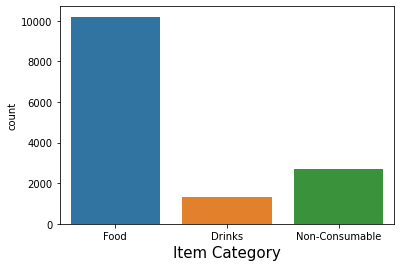

In [27]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

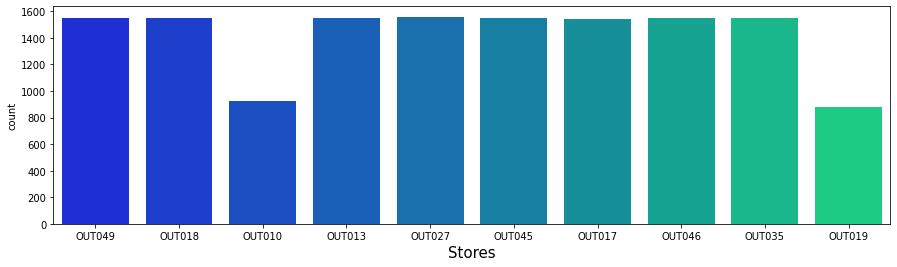

In [28]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

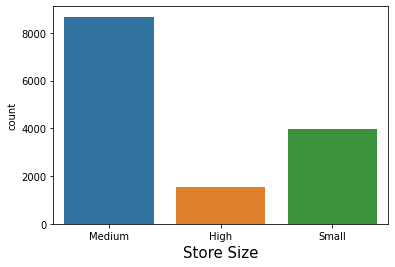

In [29]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

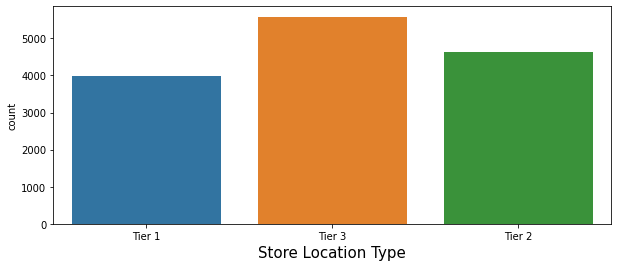

In [30]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

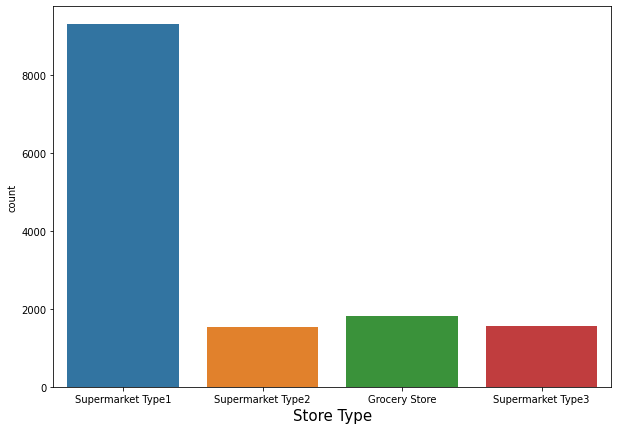

In [31]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

### Realizations
* **Item_Fat_Content**: Most Items sold are **low Fat**. 
* **Item_Type**: Distictly **fruits & veg**, **food snacks** are popular.
* **Item_Type_Combined**: Most Sold Item cateogory is food.
* **Outlet_Identifier**: Sold items are ditributed evenly amoung all stores, execpt **OUT010** and **OUT019**.
* **Outlet_Size**: Bigmart Stores are mostly in **medium size** in this data.
* **Outlet_Location_Type**: Most comon type of location is **Tier3**
* **Outlet_Type**: By a wide mergin Most Store Types are **SuperMarket Type1**.

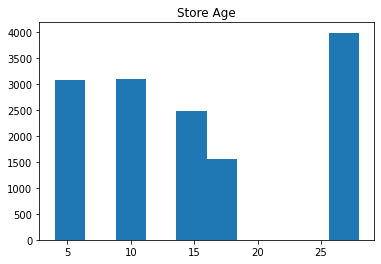

In [32]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=data['Oultet_Age'], )
plt.title('Store Age')
plt.show()

#### Realizations
* **Outlet_Age**: Most Common **Outlets** are 35 year's old.

### Bivariate plots For Numeric.
> Let's check following relationships
* **Sales per Item_MRP**
* **Sales per Item_Visibility**
* **Sales per Item_Weight**



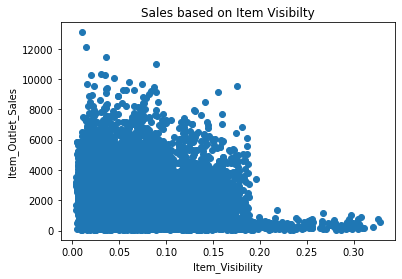

In [33]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

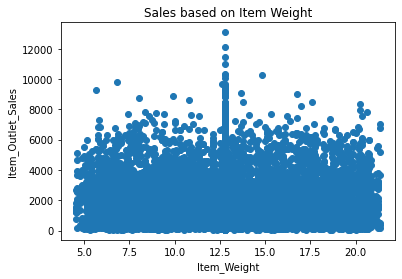

In [34]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

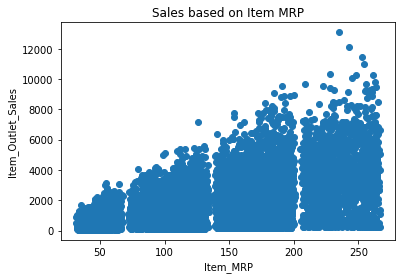

In [35]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#### Realizations
* **Item_Visibility**: Not a particular Pattern, Data is very spreaded.
* **Item_Weight**: Not a particular Pattern, Data is very spreaded.
* **Item_MRP**: Items with higer **MRP** Sales tends to sell better.

### Bivariate plots For Categorical.
> Let's check following relationships

* **Sales per Item_Type_Combined**
* **Sales per Outlet_Identifier**
* **Sales per Outlet_Type**
* **Sales per Outlet_Size**
* **Sales per Outlet_Location_Type**


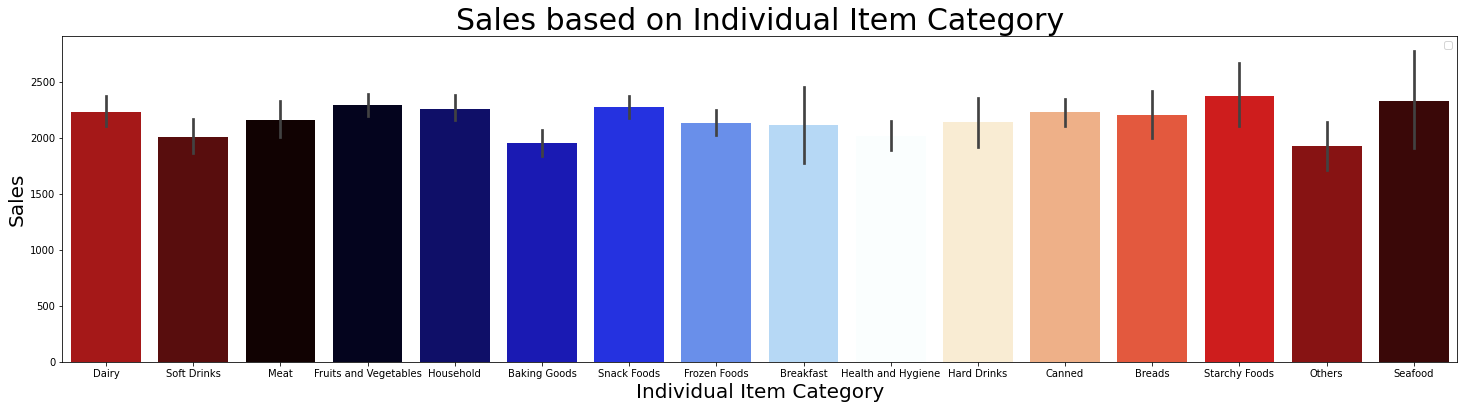

In [36]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

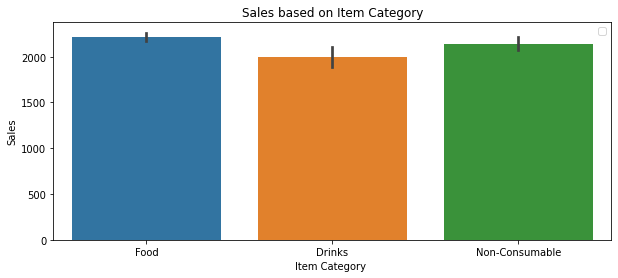

In [37]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

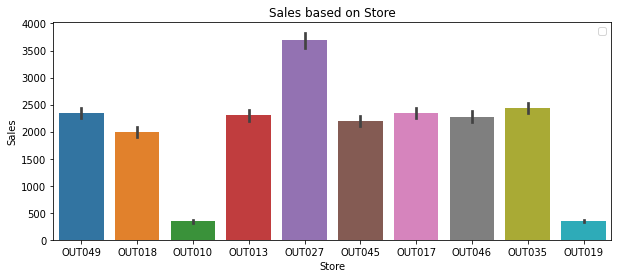

In [38]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

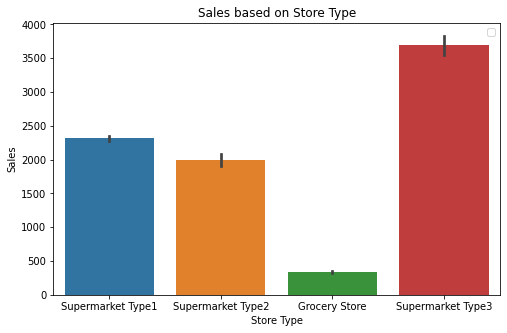

In [39]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

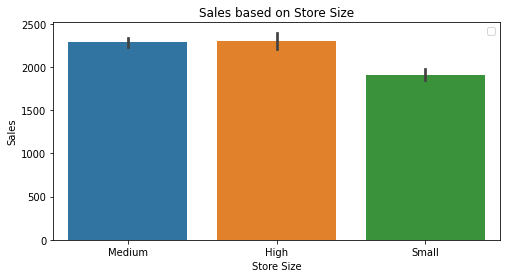

In [40]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

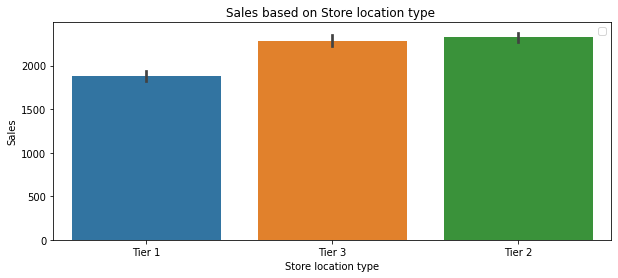

In [41]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Realizations:
* **Item_Type_Combined**: Based on Categories, **Food** has most Sells, But difference is very small.
* **Outlet_Identifier**: **Outlet027** has most profitable, and **Outlet019** and **Outlet010** has least Sells. 
* **Outlet_Type**: Most Sells are through **SuperMarket Type3** surprisingly not **Type1**.
* **Outlet_Size**: Sells are mostly even in  **Medium** and **High** size Stores.
* **Outlet_Location_Type**: Most sells are through **Tier3** and **Tier2**, **Tier2** is slightly higher.

## Multivariate plots.
Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4.Swarm plot

Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot


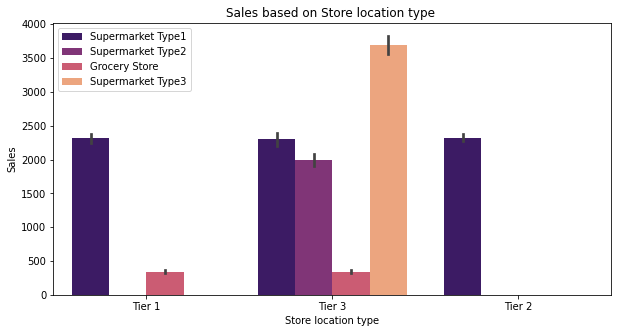

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

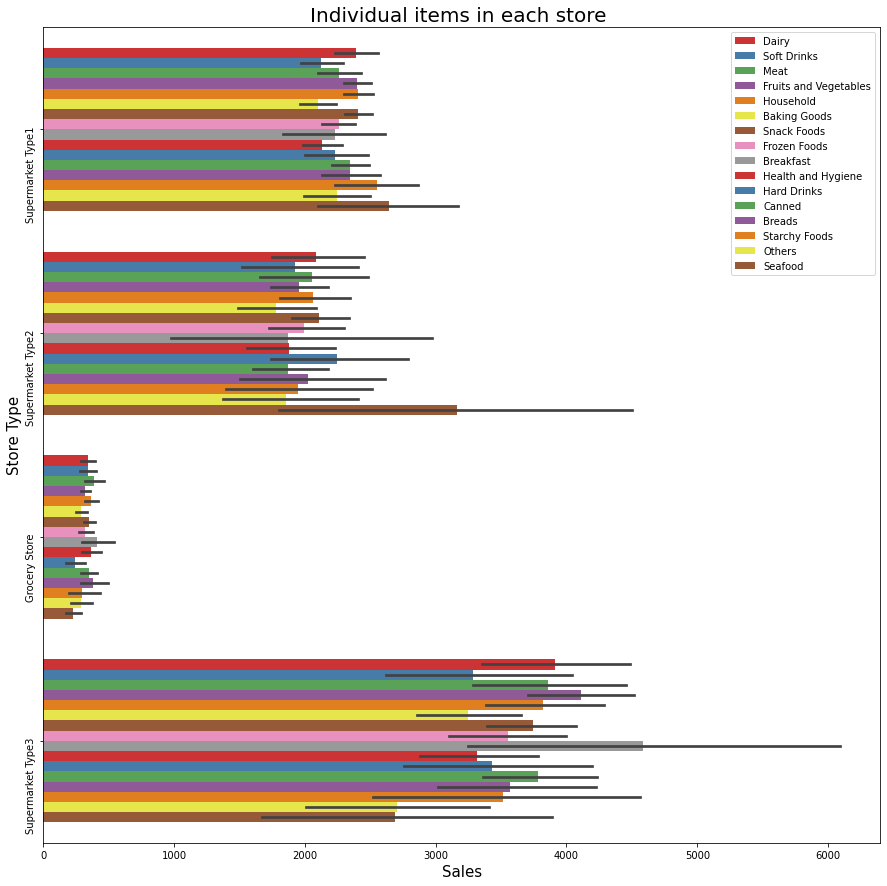

In [43]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

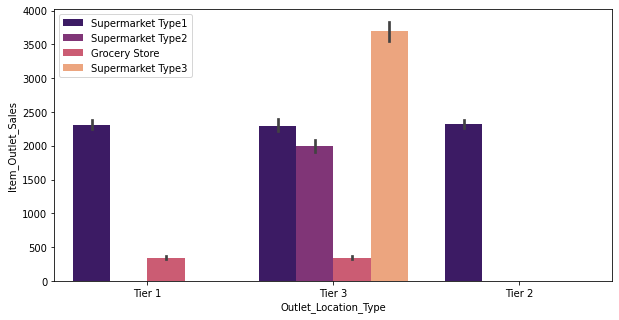

In [44]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

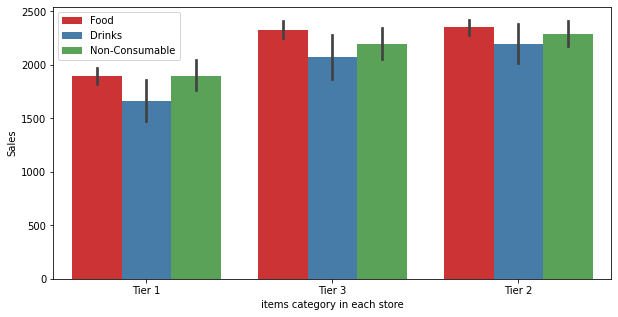

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

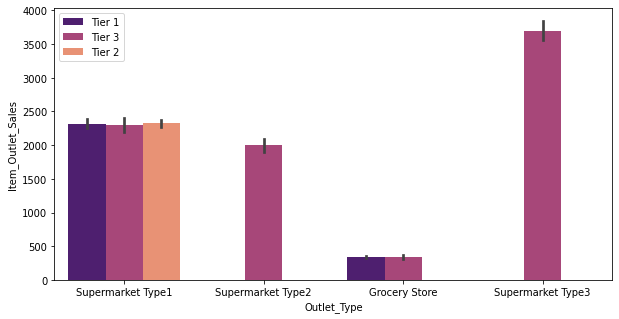

In [46]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type','Item_Outlet_Sales',hue='Outlet_Location_Type',data=data,palette='magma')
plt.legend()

### Correlation Matrix

<AxesSubplot:>

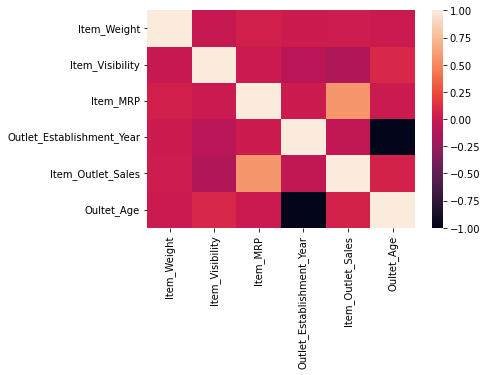

In [47]:
# Correlation Matrix
sns.heatmap(data.corr())

* We can see **Item_Outlet_Sales** is highly correlated with **Item_MRP**

### Future Engneering 
The main feature engineering techniques are:

* Categorical encoding
* Variable transformation
* Outlier engineering
* Date and time engineering

#### We have 7 categorial columns
#### Ordinal Data:
*     Item_Fat_Content
*     Outlet_Size
*     Outlet_Location_Type 

#### Nominal Data:
* Item_Identifier
* Item_Type
* Outlet_Identifier
* Outlet_Type

Since **Item_Identifier**, **Outlet_Identifier** don't have significant values, we can drop them.

In [48]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,0,0.009780,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,Non-Consumable,26


In [49]:
# One-Hot encoding (OHE) for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined', 'Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = data.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,train,Food,14,0,1,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,train,Drinks,4,1,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,train,Food,14,0,1,0,0,1,0,0
3,FDX07,19.20,1,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,train,Food,15,0,1,0,1,0,0,0
4,NCD19,8.93,0,0.009780,Household,53.8614,OUT013,1987,0,2,...,train,Non-Consumable,26,0,0,1,0,1,0,0


In [50]:
# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

# Dropping irrelevant columns in both
train  = train.drop(['Item_Identifier','Item_Type_Combined', 'source', 'Outlet_Identifier',
                           'Outlet_Establishment_Year','Outlet_Type','Item_Type'], axis=1)
test  = test.drop(['Item_Identifier','Item_Type_Combined', 'Item_Outlet_Sales', 'source', 'Outlet_Identifier',
                           'Outlet_Establishment_Year','Outlet_Type','Item_Type'], axis=1)
# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True)) 



Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8523 non-null   float64
 1   Item_Fat_Content                   8523 non-null   int64  
 2   Item_Visibility                    8523 non-null   float64
 3   Item_MRP                           8523 non-null   float64
 4   Outlet_Size                        8523 non-null   int64  
 5   Outlet_Location_Type               8523 non-null   int64  
 6   Item_Outlet_Sales                  8523 non-null   float64
 7   Oultet_Age                         8523 non-null   int64  
 8   Item_Type_Combined_Drinks          8523 non-null   int64  
 9   Item_Type_Combined_Food            8523 non-null   int64  
 10  Item_Type_Combined_Non-Consumable  8523 non-null   int64  
 11  Outlet_Type_Grocery

# Machine Learning Models
Let's divide our dataset into two variables.
* **X** as the features we defined earlier. 
* **y** as the Item_Outlet_Sales the target value we want to predict.
### Assumptions:
* This is a regression problem.
* Train test split 8:2 ratio respectively.

### Regression Models
1. **Linear Regression**
2. **Lasso Regressor**
3. **Ridge Regression**
4. **Decision Tree Regressor**
5. **Random Forest Regressor**
6. **XGBoost Regressor**
7. **Support Vector Regressor**
8. **KNN Regressor**


### Score Metrics for Regression:
**Mean Absolute Error (MAE)** - Mean of the absolute value of errors (absolute distance from true value):

**Mean Squared Error (MSE)** - Mean of the squared value of errors (squared distance from true value):

**R^2 (coefficient of determination)** - Regression score function.:


In [51]:
# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

## Linear Regression
Documentation still pending

In [52]:
# Model
model = LinearRegression(normalize=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

 Mean Absolute Error: 821.8191874237448

 Mean Squared Error: 1230734.8750450066

 R^2 Score: 0.5696035947333904

LinearRegression() Scores:
0.57
0.55
0.55
0.57
0.56
Average LinearRegression() score: 0.5602


In [53]:
# Visulization Results 

Item_Type_Combined_Non-Consumable   -8.820332e+16
Item_Type_Combined_Drinks           -8.820332e+16
Item_Type_Combined_Food             -8.820332e+16
Outlet_Type_Grocery Store           -1.306635e+16
Outlet_Type_Supermarket Type2       -1.306635e+16
Outlet_Type_Supermarket Type1       -1.306635e+16
Outlet_Type_Supermarket Type3       -1.306635e+16
Item_Visibility                     -9.997909e+01
Oultet_Age                          -2.618836e+00
Item_Weight                         -2.157045e+00
Outlet_Location_Type                 1.067765e+01
Item_MRP                             1.582379e+01
Outlet_Size                          1.601770e+01
Item_Fat_Content                     3.830136e+01
dtype: float64


<AxesSubplot:>

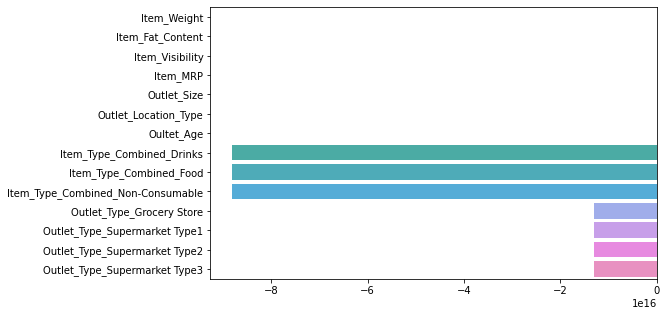

In [54]:
# vasulization of model's perfomance
LR_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LR_coef)
plt.figure(figsize=(8,5))
sns.barplot(model.coef_,model.feature_names_in_)

## Lasoo Regression
Documentation still pending

In [55]:
# Model
model = Lasso(alpha=0.05, normalize=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LS_MAE = MAE(y_test, y_predict)
LS_MSE = MSE(y_test, y_predict)
LS_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(),X,y,5)

 Mean Absolute Error: 821.3038315665473

 Mean Squared Error: 1231440.3333176589

 R^2 Score: 0.5693568911494004

Lasso() Scores:
0.57
0.55
0.55
0.57
0.56
Average Lasso() score: 0.5604


Outlet_Type_Grocery Store           -1943.998160
Outlet_Type_Supermarket Type2        -326.077151
Item_Type_Combined_Drinks              -2.786487
Item_Weight                            -1.432750
Oultet_Age                             -0.719981
Item_Visibility                         0.000000
Outlet_Location_Type                   -0.000000
Item_Type_Combined_Non-Consumable      -0.000000
Outlet_Type_Supermarket Type1           0.000000
Outlet_Size                             5.454437
Item_Fat_Content                       12.474221
Item_MRP                               15.614476
Item_Type_Combined_Food                32.154388
Outlet_Type_Supermarket Type3        1389.562332
dtype: float64


<AxesSubplot:>

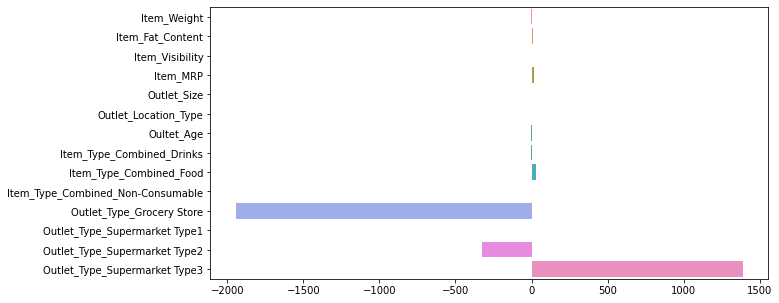

In [56]:
LS_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LS_coef)
plt.figure(figsize=(10,5))
sns.barplot(model.coef_, model.feature_names_in_)

## Ridge Regression
Documentation still pending

In [57]:
# Model
model = Ridge()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
R_MAE = MAE(y_test, y_predict)
R_MSE = MSE(y_test, y_predict)
R_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {R_MAE}\n")
print(f" Mean Squared Error: {R_MSE}\n")
print(f" R^2 Score: {R_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(),X,y,5)

 Mean Absolute Error: 821.8857005238445

 Mean Squared Error: 1231782.4601035763

 R^2 Score: 0.5692372470718741

Lasso() Scores:
0.57
0.55
0.55
0.57
0.56
Average Lasso() score: 0.5604


Outlet_Type_Supermarket Type3        1640.089286
Outlet_Type_Supermarket Type1         218.565288
Item_Visibility                        36.200217
Item_Type_Combined_Food                27.239590
Item_Fat_Content                       18.287719
Item_MRP                               15.677247
Outlet_Size                             6.013778
Outlet_Location_Type                   -2.065161
Oultet_Age                             -2.292852
Item_Weight                            -2.383208
Item_Type_Combined_Non-Consumable      -7.110734
Item_Type_Combined_Drinks             -20.128856
Outlet_Type_Supermarket Type2        -133.558858
Outlet_Type_Grocery Store           -1725.095716
dtype: float64


<AxesSubplot:>

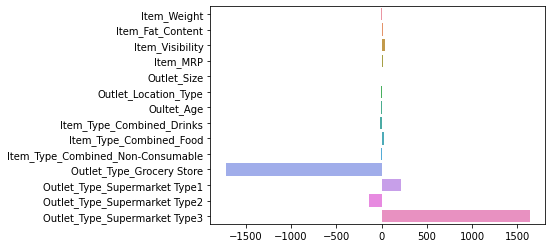

In [58]:
R_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values(ascending=False)
print(R_coef)
sns.barplot(model.coef_, model.feature_names_in_)

## Decision Tree Regressor
Documentation still pending

In [59]:
# Not Complete

# Model
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics (This is where it is not complete)
DR_MAE = MAE(y_test, y_predict)
DR_MSE = MSE(y_test, y_predict)
DR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")
print(f" R^2 Score: {DR_R_2}\n")

# Cross Validation Score check
cross_val(DecisionTreeRegressor(),X,y,5)


 Mean Absolute Error: 752.2044881796364

 Mean Squared Error: 1155565.2705063792

 R^2 Score: 0.595890919676185

DecisionTreeRegressor() Scores:
0.2
0.16
0.12
0.14
0.25
Average DecisionTreeRegressor() score: 0.1739


Item_MRP                             0.555997
Outlet_Type_Grocery Store            0.317755
Outlet_Type_Supermarket Type3        0.113033
Item_Weight                          0.004205
Outlet_Type_Supermarket Type2        0.003251
Oultet_Age                           0.002877
Item_Visibility                      0.001928
Outlet_Location_Type                 0.000954
Item_Fat_Content                     0.000000
Outlet_Size                          0.000000
Item_Type_Combined_Drinks            0.000000
Item_Type_Combined_Food              0.000000
Item_Type_Combined_Non-Consumable    0.000000
Outlet_Type_Supermarket Type1        0.000000
dtype: float64


<AxesSubplot:>

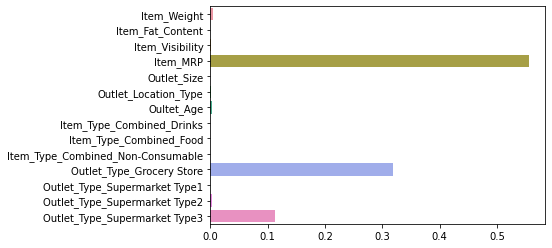

In [60]:
DR_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(DR_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

## Random Forest
Documentation still pending

In [61]:
# Model
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RandomForestRegressor(),X, y, 5)

 Mean Absolute Error: 746.3648943313059

 Mean Squared Error: 1139434.4747717793

 R^2 Score: 0.601531969295428

RandomForestRegressor() Scores:
0.56
0.54
0.52
0.55
0.56
Average RandomForestRegressor() score: 0.5453


Item_MRP                             0.557161
Outlet_Type_Grocery Store            0.319865
Outlet_Type_Supermarket Type3        0.069824
Oultet_Age                           0.047336
Item_Weight                          0.002850
Outlet_Location_Type                 0.001386
Item_Visibility                      0.001193
Item_Type_Combined_Food              0.000151
Outlet_Size                          0.000083
Item_Fat_Content                     0.000064
Outlet_Type_Supermarket Type1        0.000050
Outlet_Type_Supermarket Type2        0.000019
Item_Type_Combined_Non-Consumable    0.000018
Item_Type_Combined_Drinks            0.000000
dtype: float64


<AxesSubplot:>

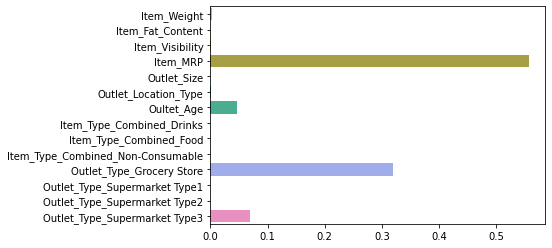

In [62]:
RFR_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(RFR_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

## XGBoost
Documentation still pending

In [63]:
# Model
model = XGBRegressor()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrix
XG_MAE = MAE(y_test, y_predict)
XG_MSE = MSE(y_test, y_predict)
XG_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")
print(f" R^2 Score: {XG_R_2}\n")
cross_val(XGBRegressor(),X, y, 5)

 Mean Absolute Error: 810.1295267961602

 Mean Squared Error: 1343877.1192528498

 R^2 Score: 0.5300369779272551

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...) Scores:
0.55
0.52
0.51
0.53
0.54
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=N

Outlet_Type_Grocery Store            0.800373
Item_MRP                             0.054948
Oultet_Age                           0.054356
Outlet_Type_Supermarket Type1        0.010838
Outlet_Location_Type                 0.010053
Item_Type_Combined_Non-Consumable    0.009789
Item_Visibility                      0.009487
Outlet_Type_Supermarket Type3        0.009146
Outlet_Size                          0.008698
Item_Type_Combined_Drinks            0.008653
Item_Type_Combined_Food              0.008403
Item_Fat_Content                     0.007940
Item_Weight                          0.007316
Outlet_Type_Supermarket Type2        0.000000
dtype: float32


<AxesSubplot:>

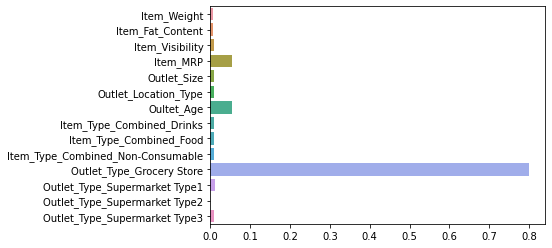

In [64]:
XG_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(XG_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

## Support Vector Regressor (SVR)
Documentation still pending

In [65]:
# Model
model = SVR()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
SVR_MAE = MAE(y_test, y_predict)
SVR_MSE = MSE(y_test, y_predict)
SVR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {SVR_MAE}\n")
print(f" Mean Squared Error: {SVR_MSE}\n")
print(f" R^2 Score: {SVR_R_2}\n")
cross_val(SVR(),X, y, 5)

 Mean Absolute Error: 1111.532991425439

 Mean Squared Error: 2318810.6142294733

 R^2 Score: 0.18909606520906586

SVR() Scores:
0.18
0.2
0.19
0.19
0.18
Average SVR() score: 0.1864


In [66]:
# Pending
#plt.scatter(X_train, X_test, color = 'magenta')
# plt.plot(X_train, y_predict, color = 'green')
# plt.title('Support Vector Regression Model')
# plt.show()

## KNN Regressor
Documentation still pending

In [67]:
# Model
model = KNeighborsRegressor(n_neighbors=7)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
KNR_MAE = MAE(y_test, y_predict)
KNR_MSE = MSE(y_test, y_predict)
KNR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {KNR_MAE}\n")
print(f" Mean Squared Error: {KNR_MSE}\n")
print(f" R^2 Score: {KNR_R_2}\n")
cross_val(KNeighborsRegressor(),X, y, 5)

 Mean Absolute Error: 861.8196522491119

 Mean Squared Error: 1446065.380850223

 R^2 Score: 0.4943010437762504

KNeighborsRegressor() Scores:
0.5
0.46
0.42
0.49
0.51
Average KNeighborsRegressor() score: 0.4783


In [68]:
# KNR_coef = pd.Series(model.n_neighbors, model.feature_names_in_)
# KNR_coef
# sns.scatterplot(model.n_neighbors, model.feature_names_in_)

# Conclusion
will do Soon!!